In [1]:
from pathlib import Path
import os

In [2]:
from PIL import Image
import random
import matplotlib.pyplot as plt
import rasterio
from matplotlib.colors import hex2color
import numpy as np
import cv2

In [3]:
from data import get_data_paths, display_samples, read_image, imshow
from processing import NDVI, threshold

In [4]:
path_toy_dataset_folder = '../flair/dataflair/'

images_path = sorted(list(get_data_paths(Path(path_toy_dataset_folder), 'IMG*.tif')), key=lambda x: int(x.split('_')[-1][:-4]))



/Users/Theo/Documents/Dépots Githubs/2023/inf573vegetalisation/flair/dataflair/flair_1_toy_aerial_train/D074_2020/Z7_NU/img/IMG_051073.tif
/Users/Theo/Documents/Dépots Githubs/2023/inf573vegetalisation/flair/dataflair/flair_1_toy_aerial_train/D013_2020/Z12_UU/img/IMG_009774.tif


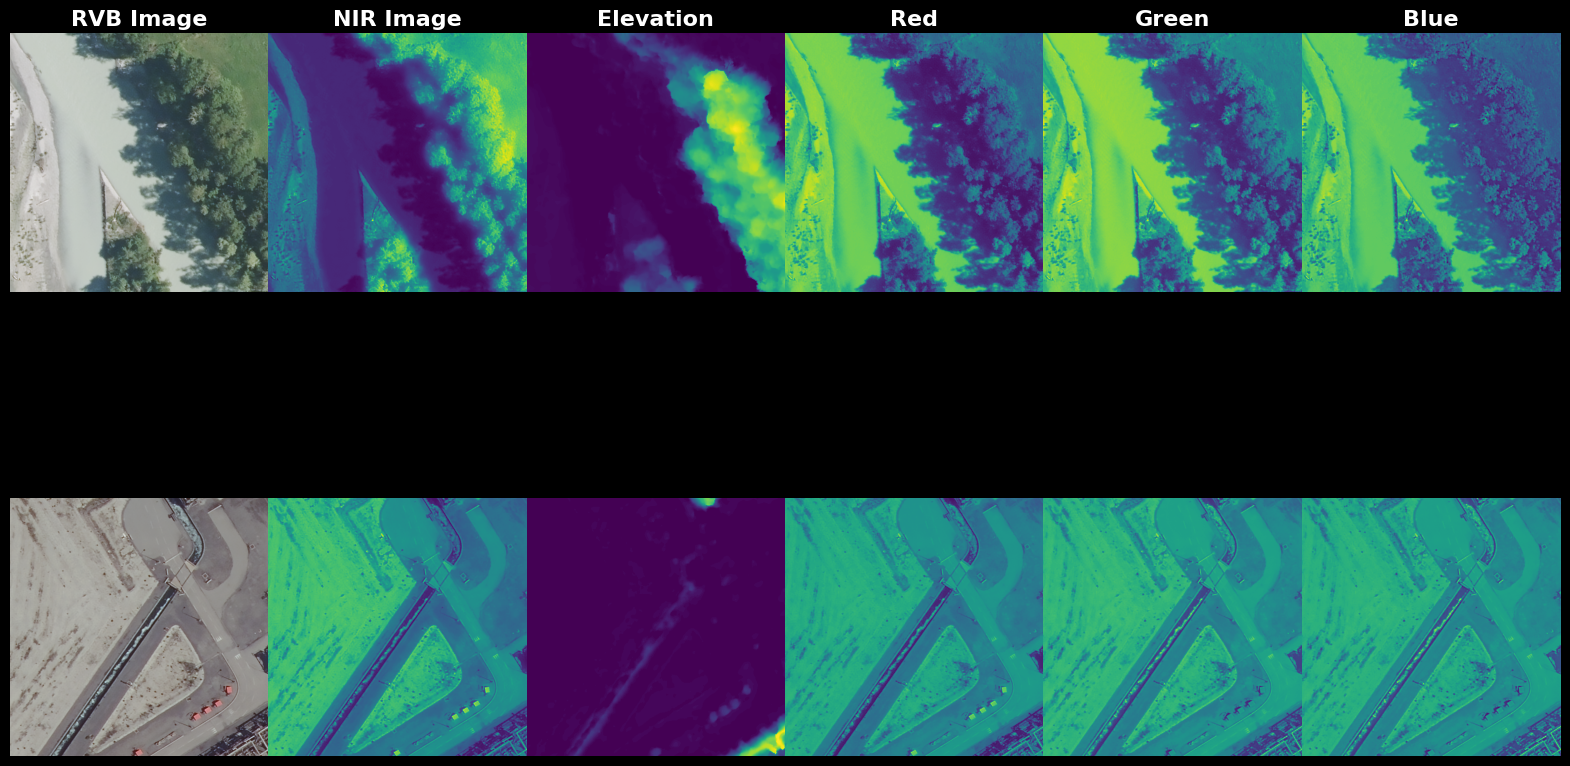

In [5]:
display_samples(images_path, nb_samples=2)

In [6]:
path_patient_zero = "/Users/Theo/Documents/Dépots Githubs/2023/inf573vegetalisation/flair/dataflair/flair_1_toy_aerial_test/D026_2020/Z13_UU/img/IMG_065011.tif"
image = read_image(path_patient_zero)


In [7]:
image.shape

(512, 512, 5)

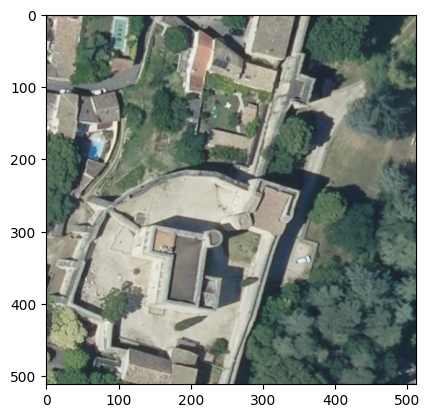

In [8]:
plt.imshow(image[:,:,:3])

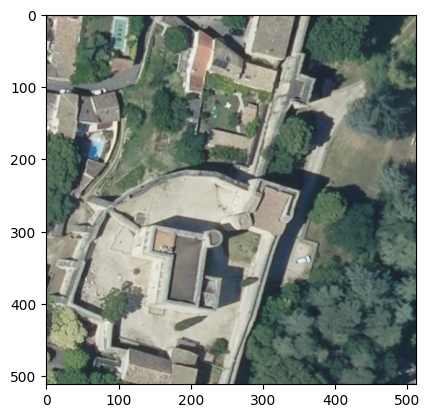

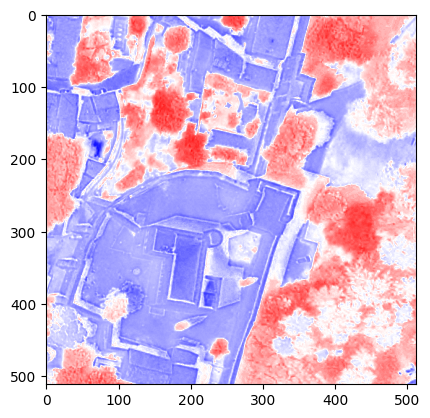

In [9]:


ndvi=NDVI(image)

min(ndvi.flatten()), max(ndvi.flatten())
imshow(image)
imshow(ndvi, cmap='bwr')

In [10]:
image

array([[[159, 165, 160,  95,  10],
        [169, 170, 160,  96,  10],
        [178, 177, 171,  96,  10],
        ...,
        [113, 125, 105, 119,   0],
        [115, 124, 107, 119,   0],
        [119, 129, 105, 121,   0]],

       [[147, 147, 137,  95,  10],
        [166, 170, 159,  93,  10],
        [182, 179, 177,  91,  10],
        ...,
        [115, 125,  97, 120,   0],
        [117, 127, 105, 120,   0],
        [120, 133, 108, 119,   0]],

       [[113, 105,  93,  97,  10],
        [146, 141, 134,  93,  10],
        [165, 165, 159,  88,  10],
        ...,
        [111, 116,  91, 117,   0],
        [119, 125, 105, 117,   0],
        [129, 135, 113, 117,   0]],

       ...,

       [[117, 123,  94, 129,  45],
        [108, 133,  85, 121,  45],
        [124, 139, 100, 120,  45],
        ...,
        [147, 158, 154,  73,   1],
        [160, 170, 166,  81,   1],
        [175, 179, 181,  89,   1]],

       [[123, 136, 100, 120,  47],
        [108, 105,  67, 123,  47],
        [126, 138

### Réglage floutage threshold

In [11]:
from ipywidgets import interact
from scipy.ndimage import gaussian_filter

@interact(t=(-1, 1, 0.05), sigma=(0.1, 5, 0.1))
def threshold_and_blur(t, sigma):
    ndvi_thresholded = threshold(ndvi, t)
    ndvi_blurred = gaussian_filter(ndvi_thresholded, sigma)
    imshow(ndvi_blurred, cmap='bwr')


interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, min=-1.0, step=0.05), FloatSlider(value…